# **Notebook 1: Exploratory Data Analysis (EDA)**

## **Welcome to the Bias-Athon 2025 - Exploratory Data Analysis!**

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tableone import TableOne
import warnings
warnings.filterwarnings("ignore")

### Load Train Data

In [2]:
data = pd.read_csv('/Users/jeremy/Desktop/widsdatathon2020/training_v2.csv')

# Display the first few rows of the dataset
data.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [3]:
data.columns.tolist()

['encounter_id',
 'patient_id',
 'hospital_id',
 'hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_m

In [4]:
print(data.columns.tolist())

cols_to_keep = [
 'patient_id', 
 'age', 
 'gender', 
 'ethnicity', 
 'elective_surgery', 
 'bmi', 
 'apache_4a_hospital_death_prob',
 'aids', 
 'cirrhosis', 
 'diabetes_mellitus', 
 'hepatic_failure', 
 'immunosuppression', 
 'leukemia', 
 'lymphoma', 
 'solid_tumor_with_metastasis',
 'readmission_status',
 'hospital_death'
]

data = data[cols_to_keep]
data.head()


['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_

,patient_id,age,gender,ethnicity,elective_surgery,bmi,apache_4a_hospital_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,readmission_status,hospital_death
0,25312,68.0,M,Caucasian,0,22.73,0.10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
1,59342,77.0,F,Caucasian,0,27.42,0.47,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
2,50777,25.0,F,Caucasian,0,31.95,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,46918,81.0,F,Caucasian,1,22.64,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,34377,19.0,M,Caucasian,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [5]:
# Get the unique values in the 'ethnicity' column
ethnicity_values = data['ethnicity'].unique()
print("Unique values in 'ethnicity' column:", ethnicity_values)


Unique values in 'ethnicity' column: ['Caucasian' nan 'Hispanic' 'African American' 'Asian' 'Native American'
 'Other/Unknown']


### Data visualizations (Table One)

In [6]:
data_dummies = pd.get_dummies(data, columns=['gender', 'ethnicity'])
data_dummies.dtypes


patient_id                         int64
age                              float64
elective_surgery                   int64
bmi                              float64
apache_4a_hospital_death_prob    float64
aids                             float64
cirrhosis                        float64
diabetes_mellitus                float64
hepatic_failure                  float64
immunosuppression                float64
leukemia                         float64
lymphoma                         float64
solid_tumor_with_metastasis      float64
readmission_status                 int64
hospital_death                     int64
gender_F                            bool
gender_M                            bool
ethnicity_African American          bool
ethnicity_Asian                     bool
ethnicity_Caucasian                 bool
ethnicity_Hispanic                  bool
ethnicity_Native American           bool
ethnicity_Other/Unknown             bool
dtype: object

In [7]:
data_dummies.columns.tolist()

['patient_id',
 'age',
 'elective_surgery',
 'bmi',
 'apache_4a_hospital_death_prob',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis',
 'readmission_status',
 'hospital_death',
 'gender_F',
 'gender_M',
 'ethnicity_African American',
 'ethnicity_Asian',
 'ethnicity_Caucasian',
 'ethnicity_Hispanic',
 'ethnicity_Native American',
 'ethnicity_Other/Unknown']

In [8]:
data_dummies.shape


(91713, 23)

In [9]:
# Check for NaN values in the data
nan_values = data_dummies.isna().sum()
print("NaN values in each column:\n", nan_values)


NaN values in each column:
 patient_id                          0
age                              4228
elective_surgery                    0
bmi                              3429
apache_4a_hospital_death_prob    7947
aids                              715
cirrhosis                         715
diabetes_mellitus                 715
hepatic_failure                   715
immunosuppression                 715
leukemia                          715
lymphoma                          715
solid_tumor_with_metastasis       715
readmission_status                  0
hospital_death                      0
gender_F                            0
gender_M                            0
ethnicity_African American          0
ethnicity_Asian                     0
ethnicity_Caucasian                 0
ethnicity_Hispanic                  0
ethnicity_Native American           0
ethnicity_Other/Unknown             0
dtype: int64


In [10]:
data_dropnan = data_dummies.dropna()
print(data_dropnan.isnull().sum())

patient_id                       0
age                              0
elective_surgery                 0
bmi                              0
apache_4a_hospital_death_prob    0
aids                             0
cirrhosis                        0
diabetes_mellitus                0
hepatic_failure                  0
immunosuppression                0
leukemia                         0
lymphoma                         0
solid_tumor_with_metastasis      0
readmission_status               0
hospital_death                   0
gender_F                         0
gender_M                         0
ethnicity_African American       0
ethnicity_Asian                  0
ethnicity_Caucasian              0
ethnicity_Hispanic               0
ethnicity_Native American        0
ethnicity_Other/Unknown          0
dtype: int64


In [11]:
# Generate Table One
# Example usage of the tableone library to create Table One

from tableone import TableOne

# Define which columns to treat as categorical and which are continuous
categorical_vars = [
    'gender_F',
    'gender_M',
    'ethnicity_African American',
    'ethnicity_Asian',
    'ethnicity_Caucasian',
    'ethnicity_Hispanic',
    'ethnicity_Native American',
    'ethnicity_Other/Unknown',
    'elective_surgery', 
    'aids', 
    'cirrhosis', 
    'diabetes_mellitus', 
    'hepatic_failure', 
    'immunosuppression', 
    'leukemia', 
    'lymphoma', 
    'solid_tumor_with_metastasis', 
    'hospital_death'
]

# Define your continuous variables
continuous_vars = [
    'age', 
    'bmi', 
    'apache_4a_hospital_death_prob'
]

# Optionally, group by hospital_death to see comparisons between groups
group_by = 'hospital_death'

# Build the table
table1 = TableOne(
    data_dropnan, 
    columns=categorical_vars + continuous_vars,  # columns to include in the table
    categorical=categorical_vars,
    groupby=group_by,          # column to group by
    nonnormal=continuous_vars, # treat continuous_vars columns as non-normal for distribution
    pval=True,                 # show p-values
    missing=True               # show counts of missing data
)

# Display the table
table1

Grouped by hospital_death                                                              
                                                                      Missing           Overall                 0                 1 P-Value
n                                                                                         77575             71052              6523        
gender_F, n (%)                               False                                42383 (54.6)      38881 (54.7)       3502 (53.7)   0.111
                                              True                                 35192 (45.4)      32171 (45.3)       3021 (46.3)        
gender_M, n (%)                               False                                35199 (45.4)      32178 (45.3)       3021 (46.3)   0.114
                                              True                                 42376 (54.6)      38874 (54.7)       3502 (53.7)        
ethnicity_African American, n (%)             False                                69168 (89.2)      63276 (89.1)       5892 (90.3)   0.002
                                              True                                  8407 (10.8)       7776 (10.9)         631 (9.7)        
ethnicity_Asian, n (%)                        False                                76592 (98.7)      70152 (98.7)       6440 (98.7)   1.000
                                              True                                    983 (1.3)         900 (1.3)          83 (1.3)        
ethnicity_Caucasian, n (%)                    False                                17927 (23.1)      16502 (23.2)       1425 (21.8)   0.012
                                              True                                 59648 (76.9)      54550 (76.8)       5098 (78.2)        
ethnicity_Hispanic, n (%)                     False                                74410 (95.9)      68182 (96.0)       6228 (95.5)   0.064
                                              True                                   3165 (4.1)        2870 (4.0)         295 (4.5)        
ethnicity_Native American, n (%)              False                                76934 (99.2)      70470 (99.2)       6464 (99.1)   0.511
                                              True                                    641 (0.8)         582 (0.8)          59 (0.9)        
ethnicity_Other/Unknown, n (%)                False                                73933 (95.3)      67694 (95.3)       6239 (95.6)   0.184
                                              True                                   3642 (4.7)        3358 (4.7)         284 (4.4)        
elective_surgery, n (%)                       0                                    62816 (81.0)      56750 (79.9)       6066 (93.0)  <0.001
                                              1                                    14759 (19.0)      14302 (20.1)         457 (7.0)        
aids, n (%)                                   0.0                                  77505 (99.9)      70991 (99.9)       6514 (99.9)   0.260
                                              1.0                                      70 (0.1)          61 (0.1)           9 (0.1)        
cirrhosis, n (%)                              0.0                                  76334 (98.4)      70033 (98.6)       6301 (96.6)  <0.001
                                              1.0                                    1241 (1.6)        1019 (1.4)         222 (3.4)        
diabetes_mellitus, n (%)                      0.0                                  59910 (77.2)      54765 (77.1)       5145 (78.9)   0.001
                                              1.0                                  17665 (22.8)      16287 (22.9)       1378 (21.1)        
hepatic_failure, n (%)                        0.0                                  76547 (98.7)      70212 (98.8)       6335 (97.1)  <0.001
                                              1.0                                    1028 (1.3)         840 (1.2)         188 (2.9) 

### Visualize Mortality per Ethnic Group (Normalized)

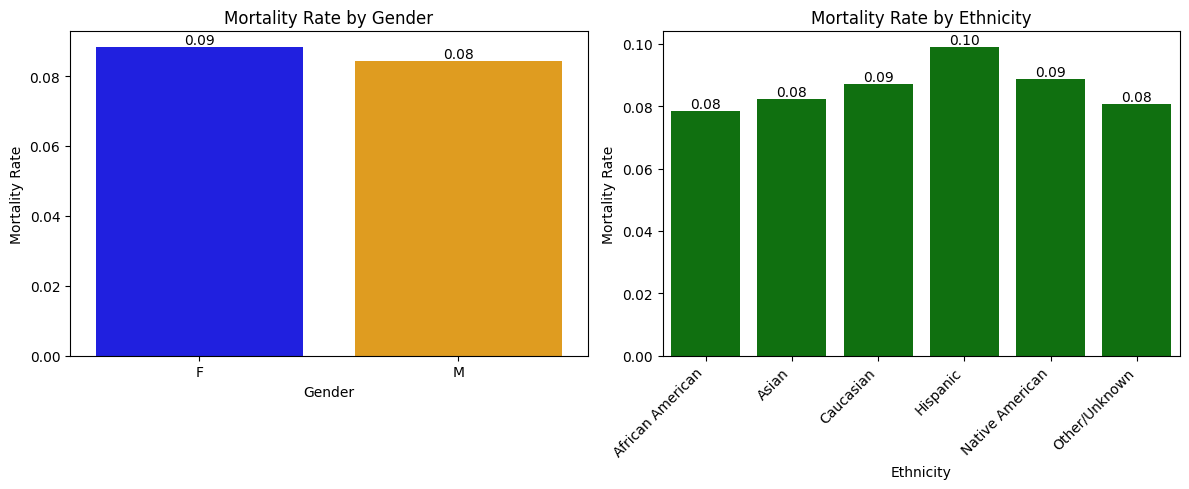

In [12]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mortality rates by gender
gender_mortality = data.groupby('gender')['hospital_death'].mean().reset_index()

# Calculate mortality rates by ethnicity
ethnicity_mortality = data.groupby('ethnicity')['hospital_death'].mean().reset_index()

# Plot histogram for gender
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='gender', y='hospital_death', data=gender_mortality, palette=['blue', 'orange'])
plt.title('Mortality Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=0)

# Add values on top of the bars
for index, value in enumerate(gender_mortality['hospital_death']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Plot histogram for ethnicity
plt.subplot(1, 2, 2)
sns.barplot(x='ethnicity', y='hospital_death', data=ethnicity_mortality, color='green')
plt.title('Mortality Rate by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45, ha='right')

# Add values on top of the bars
for index, value in enumerate(ethnicity_mortality['hospital_death']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Train Test Split

In [17]:
# Drop the 'gender_M' and 'ethnicity_Other' columns
data_dropnan = data_dropnan.drop(columns=['gender_M', 'ethnicity_Other/Unknown'])


In [18]:

from sklearn.model_selection import train_test_split

# Define your features and target variable
X = data_dropnan.drop('hospital_death', axis=1)  # Features
y = data_dropnan['hospital_death']               # Target variable

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (62060, 20)
X_test shape: (15515, 20)
y_train shape: (62060,)
y_test shape: (15515,)


### Random Forest Model

In [19]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate AUROC
from sklearn.metrics import roc_auc_score
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"AUROC: {auroc:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.92
AUROC: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     14214
           1       0.59      0.22      0.32      1301

    accuracy                           0.92     15515
   macro avg       0.76      0.60      0.64     15515
weighted avg       0.90      0.92      0.90     15515

Confusion Matrix:
[[14013   201]
 [ 1017   284]]


### Variable Perfomance by Gender and Ethnicity

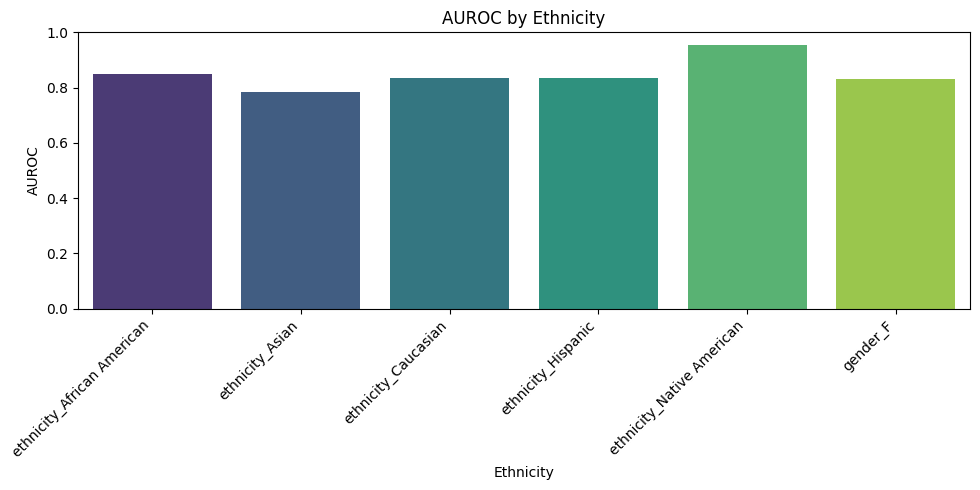

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score

# Function to calculate AUROC for a given subgroup
def calculate_auroc_by_group(data, group_columns, model, X_test, y_test):
    auroc_scores = {}
    for group_column in group_columns:
        # Filter the test set for the current group
        group_indices = X_test[group_column] == 1
        X_group = X_test[group_indices]
        y_group = y_test[group_indices]
        
        # Calculate AUROC if the group has enough samples
        if len(y_group) > 0:
            y_pred_proba_group = model.predict_proba(X_group)[:, 1]
            auroc_scores[group_column] = roc_auc_score(y_group, y_pred_proba_group)
    
    return auroc_scores

# Define the ethnicity columns
ethnicity_columns = [
    'ethnicity_African American',
    'ethnicity_Asian',
    'ethnicity_Caucasian',
    'ethnicity_Hispanic',
    'ethnicity_Native American',
    'gender_F'
]

# Calculate AUROC by ethnicity
auroc_by_ethnicity = calculate_auroc_by_group(data_dropnan, ethnicity_columns, rf_model, X_test, y_test)

# Plot AUROC by ethnicity
plt.figure(figsize=(10, 5))
sns.barplot(x=list(auroc_by_ethnicity.keys()), y=list(auroc_by_ethnicity.values()), palette='viridis')
plt.title('AUROC by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('AUROC')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()